In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasının yolu
dosya_yolu = "C:/Users/dmtdg/Downloads/asset-v1_Kodlasam+MS01+2023_06+type@asset+block@nobel.csv"

# CSV dosyasını yükleme ve bir DataFrame'e dönüştürme
nobel_data = pd.read_csv(dosya_yolu)

In [55]:
nobel_data.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,172.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,185.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,170.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,196.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,202.0


In [5]:
nobel_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [42]:
nobel_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

1-Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz?

In [38]:
top_contries = nobel_data['birth_country'].value_counts().head(10)
print("Nobel ödüllerini en çok kazanan ilk on ülke:")
top_contries

Nobel ödüllerini en çok kazanan ilk on ülke:


birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: count, dtype: int64

2-Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.

In [25]:
nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')

female = nobel_data[nobel_data['sex'] == 'Female']

first_female = female.sort_values('year').groupby('category').first()

print("Nobel ödüllerini kazanan ilk kadınlar:")
first_female[['full_name', 'year']]

Nobel ödüllerini kazanan ilk kadınlar:


,full_name,year
category,,
Chemistry,"Marie Curie, née Sklodowska",1911-01-01
Economics,Elinor Ostrom,2009-01-01
Literature,Selma Ottilia Lovisa Lagerlöf,1909-01-01
Medicine,"Gerty Theresa Cori, née Radnitz",1947-01-01
Peace,"Baroness Bertha Sophie Felicita von Suttner, n...",1905-01-01
Physics,"Marie Curie, née Sklodowska",1903-01-01


3-Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.

In [27]:
nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')

male = nobel_data[nobel_data['sex'] == 'Male']

first_male = male.sort_values('year').groupby('category').first()

print("Nobel ödüllerini kazanan ilk erkekler:")
first_male[['full_name', 'year']]

Nobel ödüllerini kazanan ilk erkekler:


,full_name,year
category,,
Chemistry,Jacobus Henricus van 't Hoff,1901-01-01
Economics,Ragnar Frisch,1969-01-01
Literature,Sully Prudhomme,1901-01-01
Medicine,Emil Adolf von Behring,1901-01-01
Peace,Jean Henry Dunant,1901-01-01
Physics,Wilhelm Conrad Röntgen,1901-01-01


4-Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?

In [58]:
usa_data = nobel_data[nobel_data['birth_country'] == 'United States of America']
usa_data

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
35,1906,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN,1919-01-06,"Oyster Bay, NY",United States of America,166.0
72,1912,Peace,The Nobel Peace Prize 1912,NaN,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",United States of America,Male,NaN,NaN,NaN,1937-02-07,"New York, NY",United States of America,179.0
79,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America,156.0
95,1919,Peace,The Nobel Peace Prize 1919,NaN,1/1,483,Individual,Thomas Woodrow Wilson,1856-12-28,"Staunton, VA",United States of America,Male,NaN,NaN,NaN,1924-02-03,"Washington, DC",United States of America,168.0
117,1923,Physics,The Nobel Prize in Physics 1923,"""for his work on the elementary charge of elec...",1/1,28,Individual,Robert Andrews Millikan,1868-03-22,"Morrison, IL",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1953-12-19,"San Marino, CA",United States of America,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,2014,Chemistry,The Nobel Prize in Chemistry 2014,"""for the development of super-resolved fluores...",1/3,909,Individual,Eric Betzig,1960-01-13,"Ann Arbor, MI",United States of America,Male,"Janelia Research Campus, Howard Hughes Medical...","Ashburn, VA",United States of America,NaN,NaN,NaN,64.0
878,2014,Chemistry,The Nobel Prize in Chemistry 2014,"""for the development of super-resolved fluores...",1/3,911,Individual,William E. Moerner,1953-06-24,"Pleasanton, CA",United States of America,Male,Stanford University,"Stanford, CA",United States of America,NaN,NaN,NaN,71.0
881,2014,Medicine,The Nobel Prize in Physiology or Medicine 2014,"""for their discoveries of cells that constitut...",1/2,903,Individual,John O'Keefe,1939-11-18,"New York, NY",United States of America,Male,University College,London,United Kingdom,NaN,NaN,NaN,85.0
890,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",United States of America,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,78.0


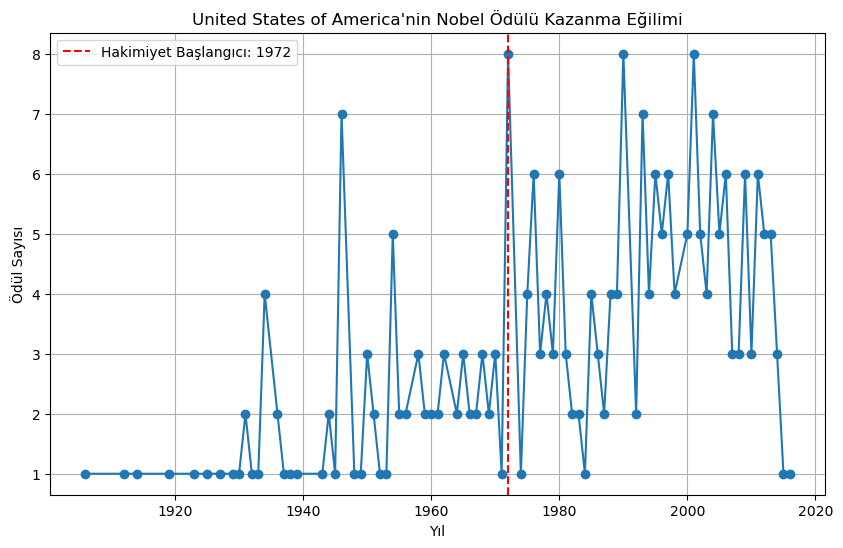

In [56]:
# En çok ödül kazanan ülkenin verilerini filtreleme
most_awarded_country_data = nobel_data[nobel_data['birth_country'] == most_awarded_country]

# Yıllara göre ödül sayısını hesaplama
yearly_counts = most_awarded_country_data['year'].value_counts().sort_index()

# Hakimiyet sağlanan yılı belirleme
start_year = yearly_counts.idxmax()

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title(f"{most_awarded_country}'nin Nobel Ödülü Kazanma Eğilimi")
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.axvline(x=start_year, color='red', linestyle='--', label=f'Hakimiyet Başlangıcı: {start_year}')
plt.legend()
plt.grid(True)
plt.show()


4.SORU YORUMU: 1950 ve 1970 yılları arsaında Amerika büyük bir savaşın içerisindeydi. Bunun sonucunda 1972 yılında kimya alanında 3 ödül verilmiş. Savaş,mühimmatlar ile ilgili uğraşlar,buluşlar neticesinde bu ödüllerin verildiğini düşünüyorum.
Ayrıca 1970 yılından sonra Amerikaya ciddi bir göç harekatı başlamış. Aydın, genç nüfus artışının bu ödüllerin artmasında katkısı büyüktür.

5-Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


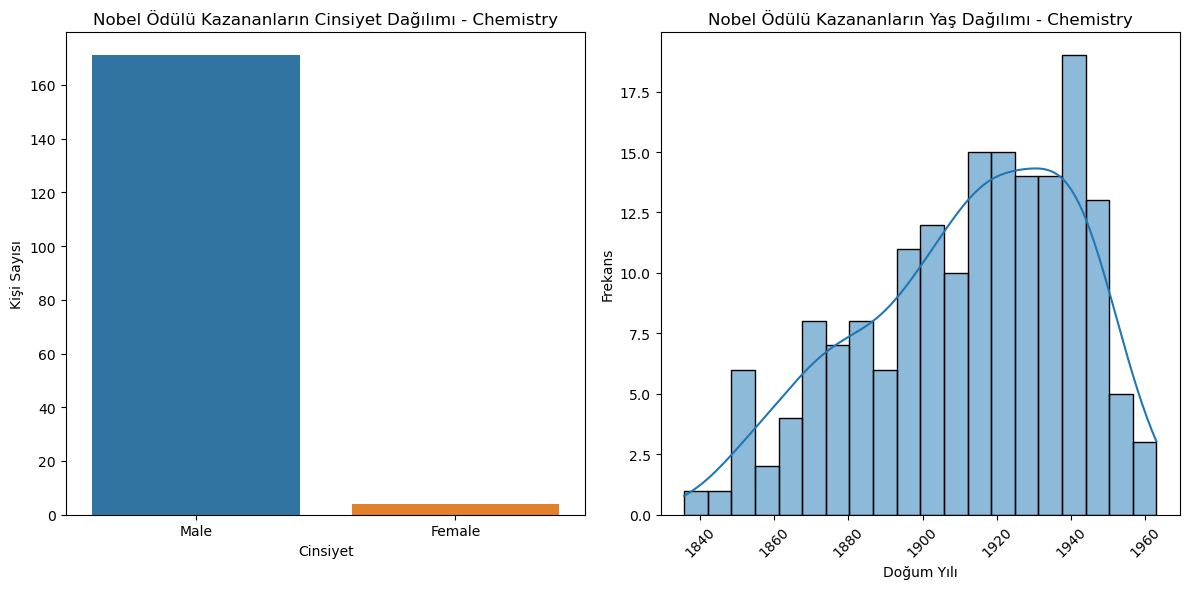

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


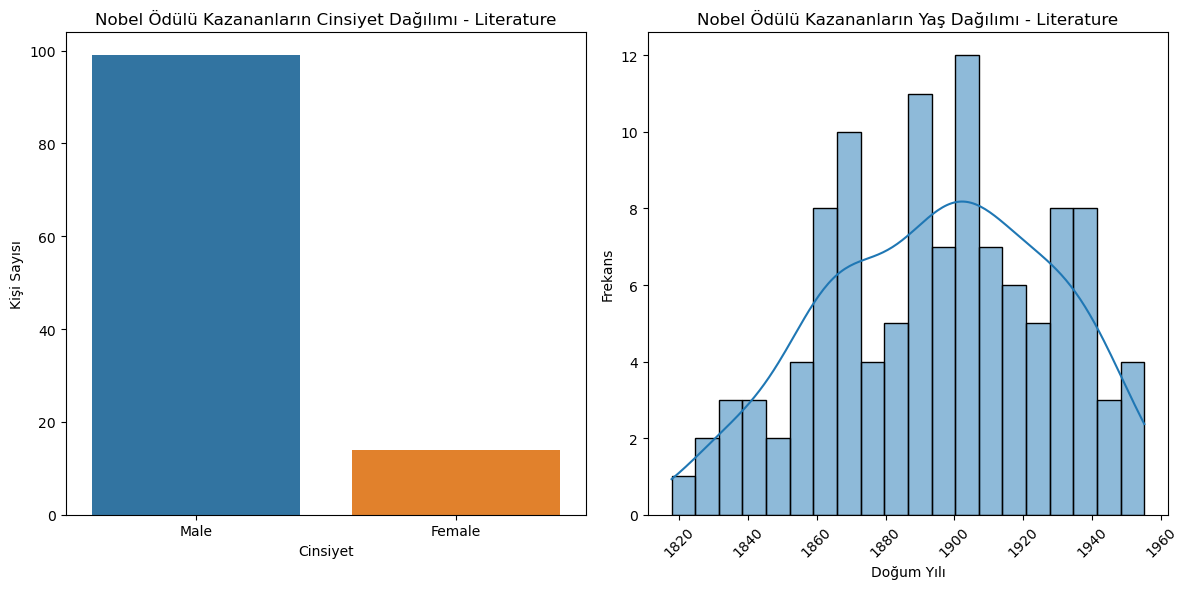

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


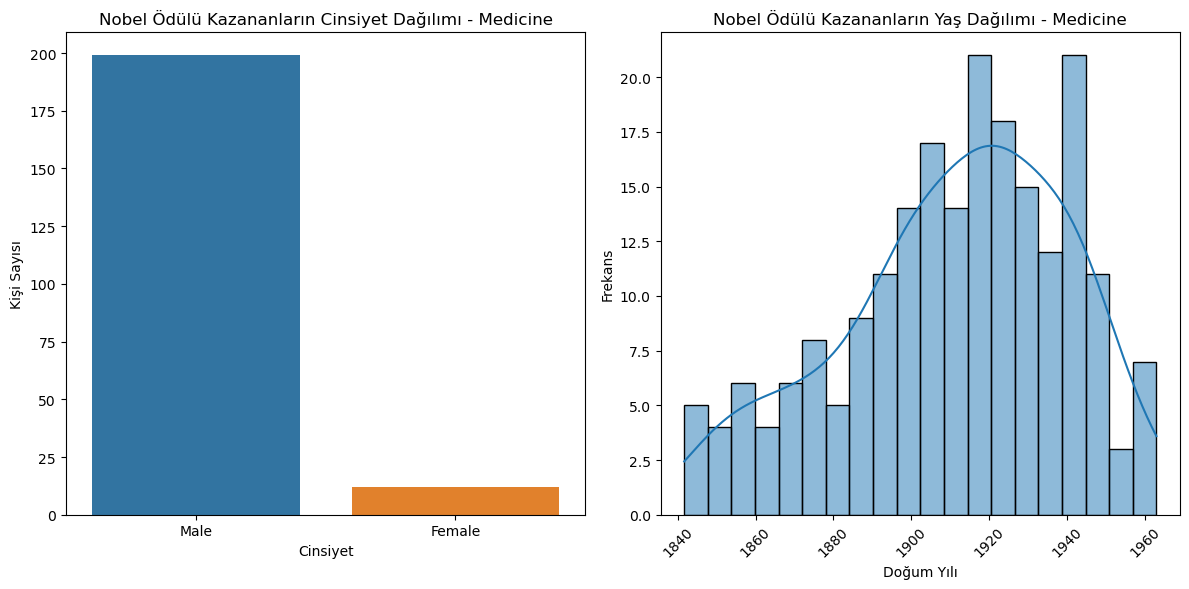

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


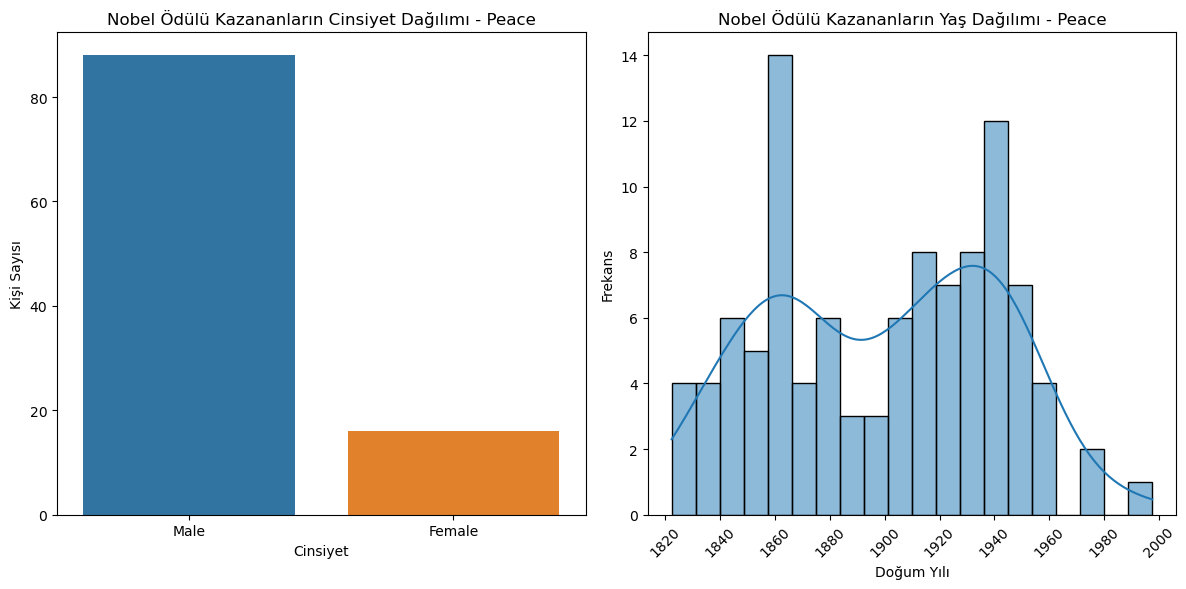

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


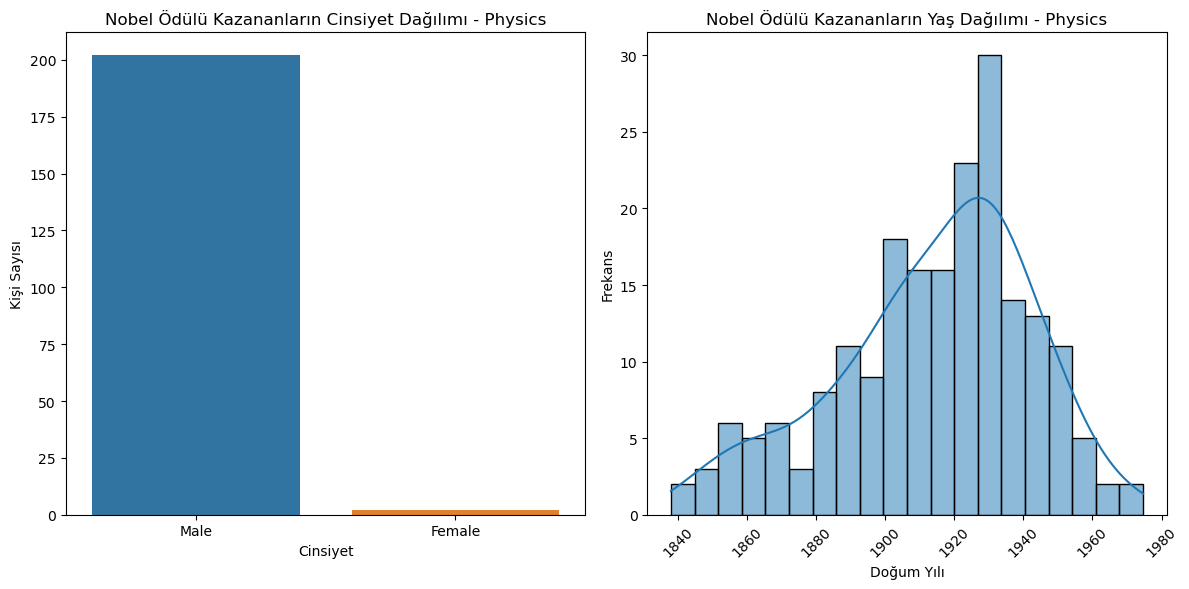

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


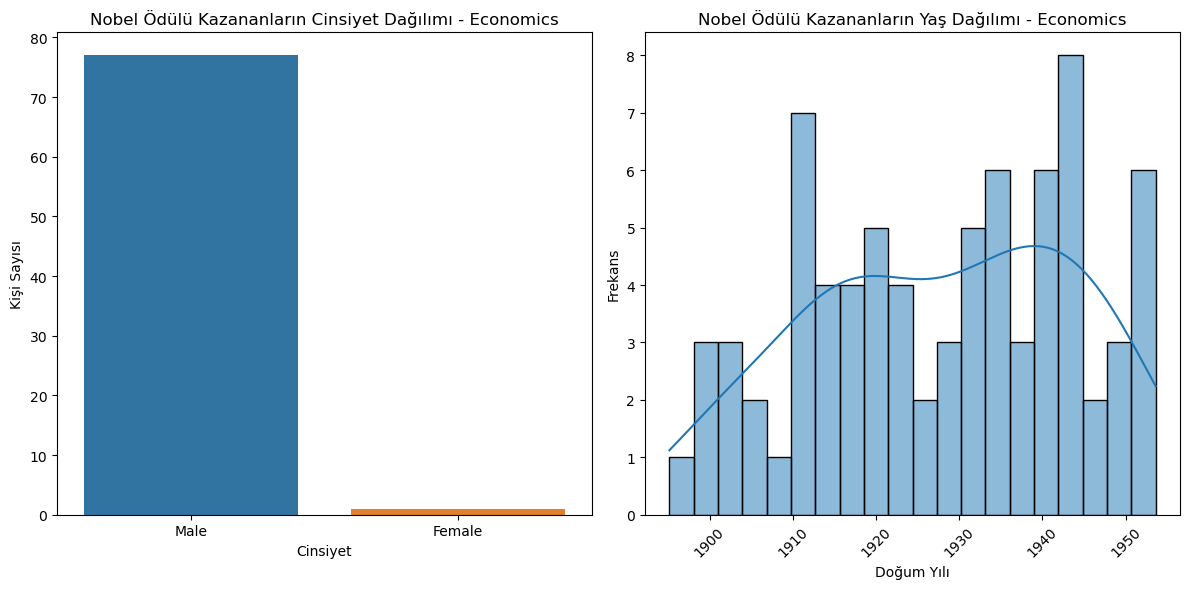

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kategoriler listesi
categories = nobel_data['category'].unique()

for category in categories:
    category_data = nobel_data[nobel_data['category'] == category]
    
    # Cinsiyet Dağılımı
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(data=category_data, x='sex')
    plt.title(f'Nobel Ödülü Kazananların Cinsiyet Dağılımı - {category}')
    plt.xlabel('Cinsiyet')
    plt.ylabel('Kişi Sayısı')
    
    # Yaş Dağılımı
    plt.subplot(1, 2, 2)
    sns.histplot(data=category_data, x='birth_date', bins=20, kde=True)
    plt.title(f'Nobel Ödülü Kazananların Yaş Dağılımı - {category}')
    plt.xlabel('Doğum Yılı')
    plt.ylabel('Frekans')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


5.SORU YORUMU: Genel tabloya baktığımızda ödül kazananların büyük çoğunluğu erkek. Barış ve edebiyat ödüllerinde yıllar içinde kadınların sayısının arttığını görüyoruz. Bunun sebebi dünyada ki savaş ortamının erkekler üzerin getirdiği olumsuzluklar olarak düşünebiliriz. Ekonomi alanında kadınların daha az sayıda ödül almasının sebebinin ise ekonomik olguların erkek egemenliğinde olması olarak düşünmekteyim. 
Grafiklerden edindiğimiz bilgiler sonucunda barış ödüllerinin daha genç yaşta kişilere verildiğini elde ettik. Bunun sebebi olarak genç nüfusun atalarının getirmiş olduğu kaos ortamından rahatsızlığını ve aydın olarak daha iyi bir ortam için çalışmalar yaptığını düşünebiliriz. 

6-1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

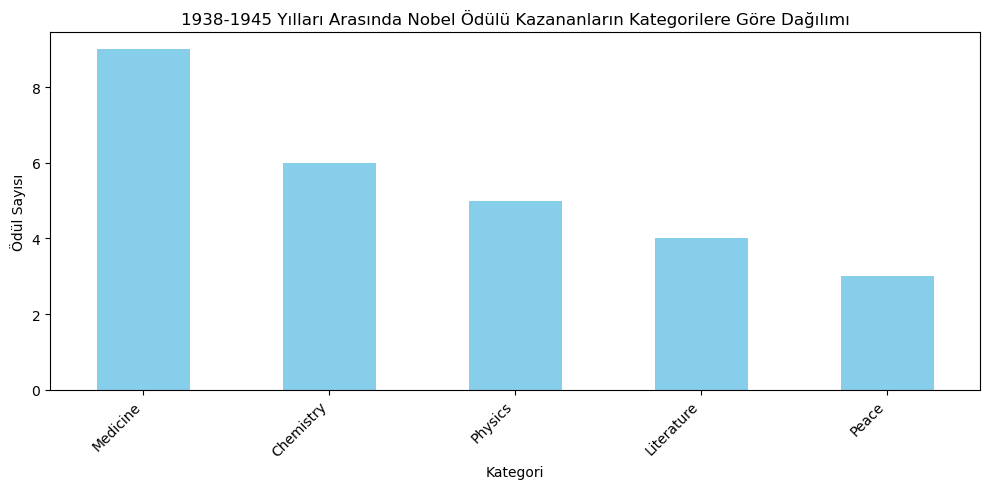

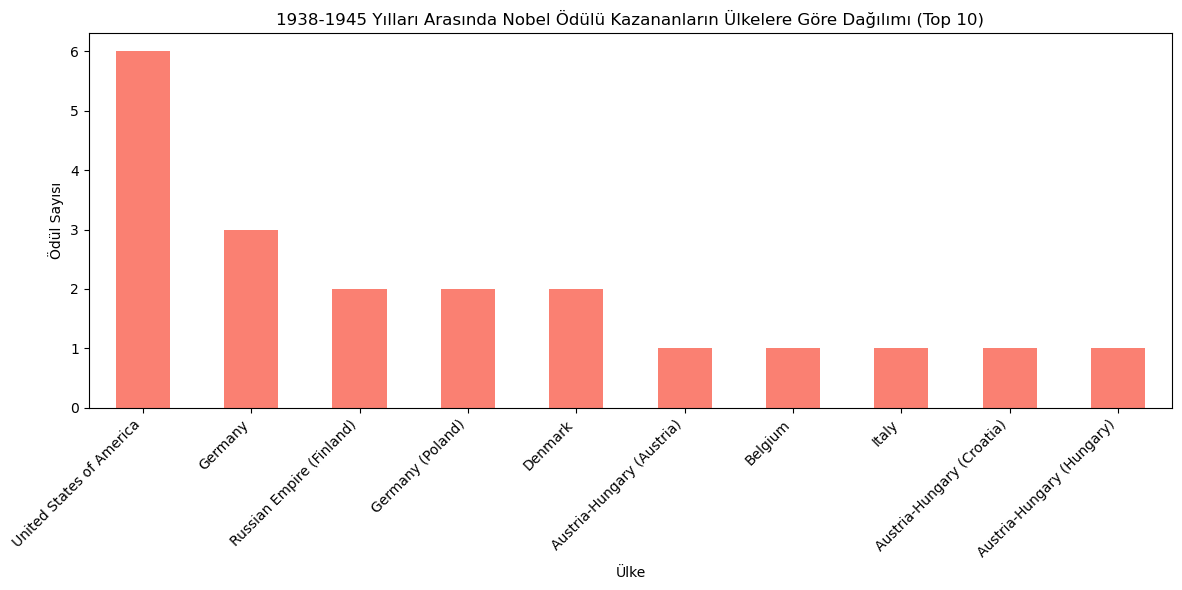

In [6]:
nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')

# Yalnızca 1938-1945 yılları arasında kazananları filtreleme
nobel_data_filtered = nobel_data[(nobel_data['year'] >= '1938-01-01') & (nobel_data['year'] <= '1945-12-31')]

# Kategorilere göre ödül sayılarını hesaplayın
category_counts = nobel_data_filtered['category'].value_counts()

# Ülkelere göre ödül sayılarını hesaplayın
country_counts = nobel_data_filtered['birth_country'].value_counts()

# Kategorilere göre ödül sayılarını görselleştirme
plt.figure(figsize=(10, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazananların Kategorilere Göre Dağılımı')
plt.xlabel('Kategori')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Ülkelere göre ödül sayılarını görselleştirme
plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar', color='salmon')
plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazananların Ülkelere Göre Dağılımı (Top 10)')
plt.xlabel('Ülke')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. SORU YORUMU: Bu tarihler arasında olan savaşların ödüllerin dağılımında önemli rol oynadığını düşünüyorum. Ödül alan 10 ülkeye baktığımız zaman Amerika Almanya gibi büyük ülkelerin 1938-1945 tarihlerinde ki savaş geçmişleri sağlık alanının öneminden kaynaklı daha fazla arştırılmaya daha fazla öğrenilmeye yitmiştir. Bunun sonucunda sağlık alanında bu tarihler arasında daha fazla ödül verilmiştir. İkinci sırada yer alan kimya alanın da daha fazla ödül alınması da bunun sonucudur.  

7-1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)

In [21]:
category_country_df = nobel_data.groupby(['category', 'birth_country']).size().reset_index(name='count')

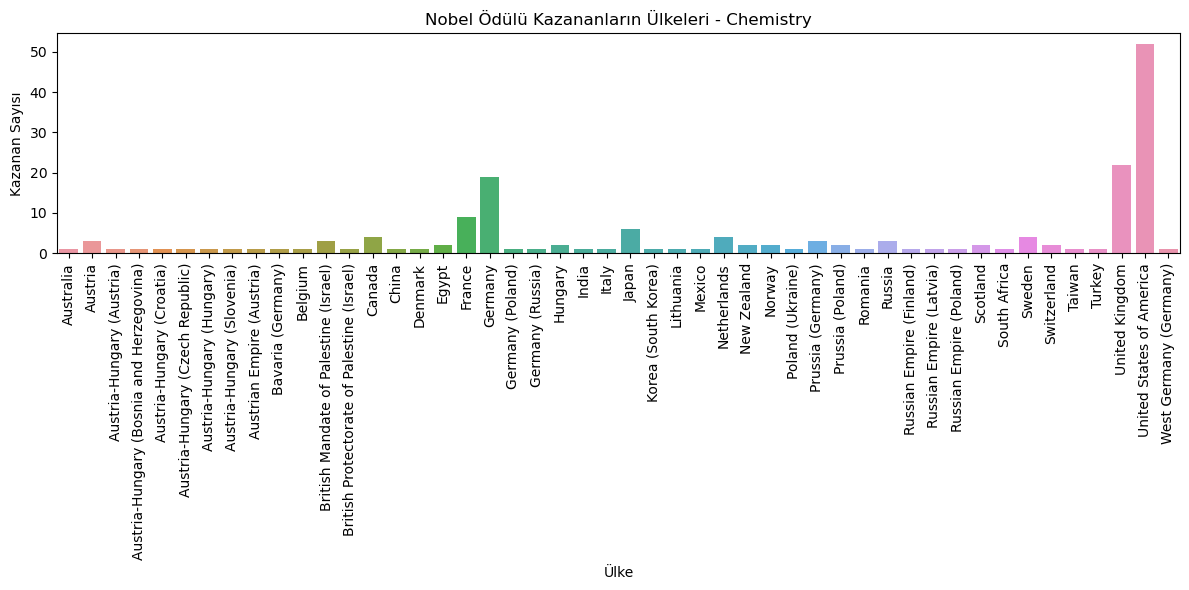

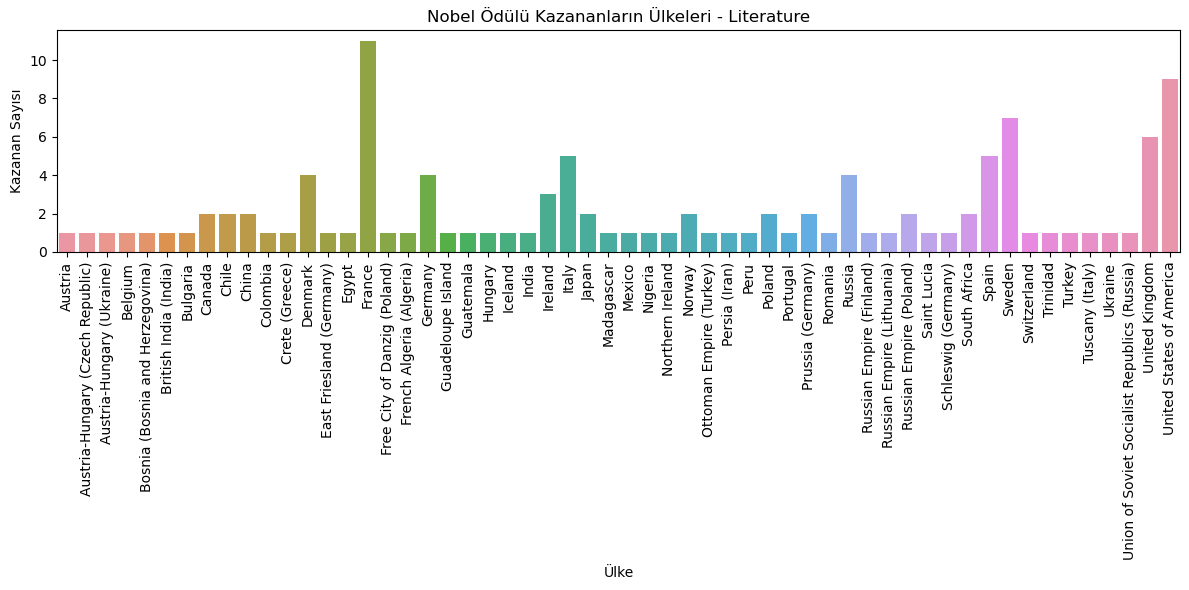

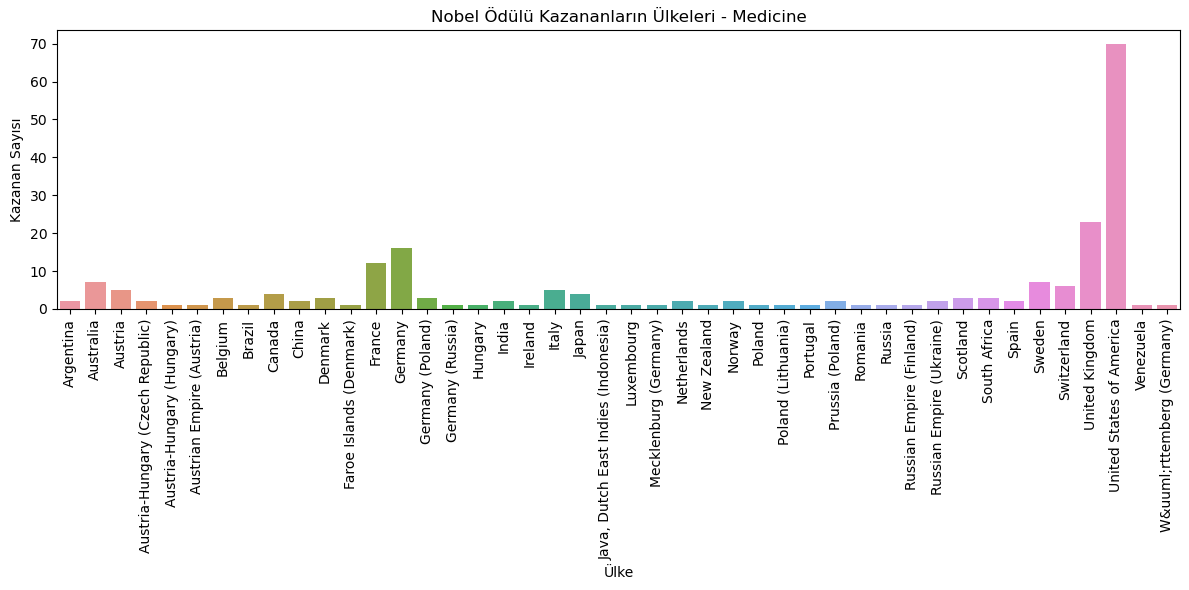

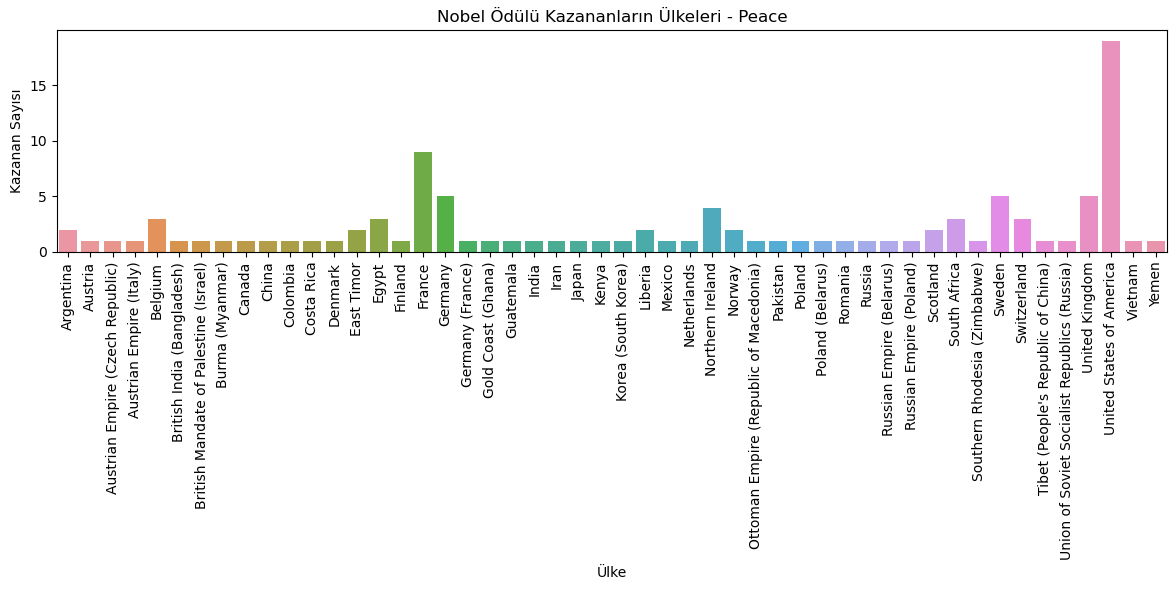

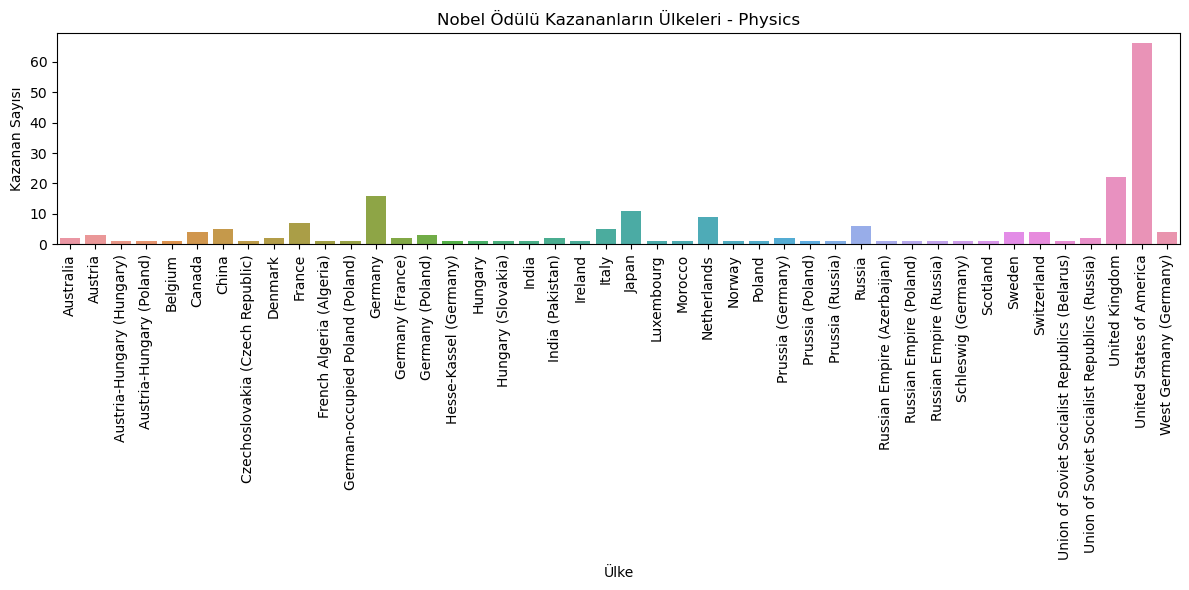

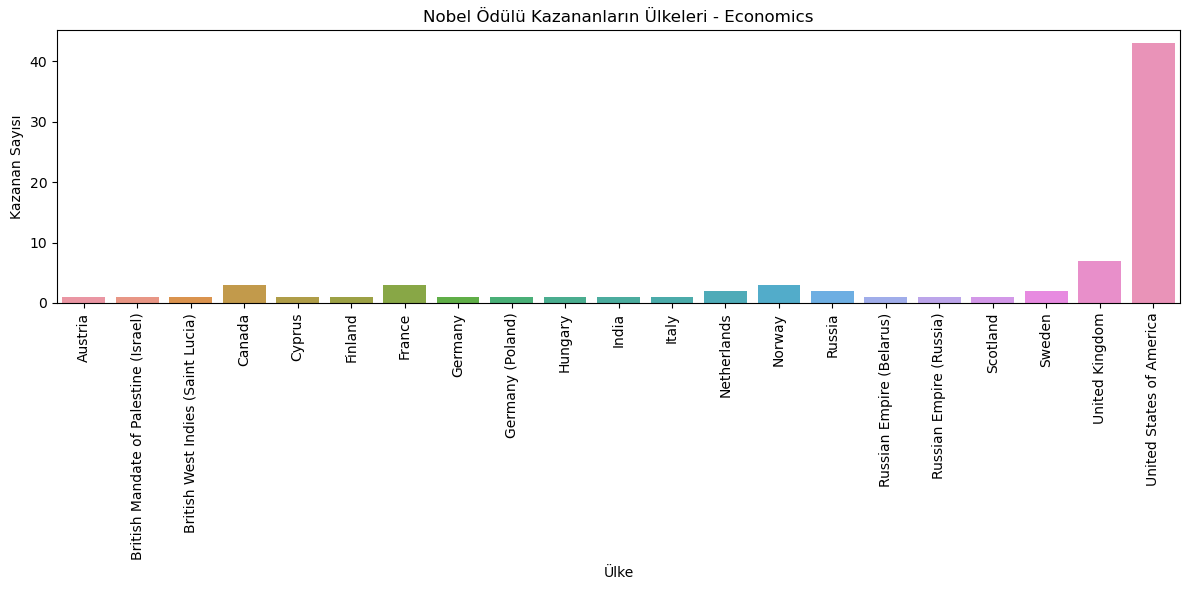

In [23]:
categories = nobel_data['category'].unique()
for category in categories:
    category_data = category_country_df[category_country_df['category'] == category]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=category_data, x='birth_country', y='count')
    plt.title(f'Nobel Ödülü Kazananların Ülkeleri - {category}')
    plt.xlabel('Ülke')
    plt.ylabel('Kazanan Sayısı')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

7. SORU YORUMU: İlk olarak grafiklere göz genel olarak baktığımızda Edebiyat alanı dışında diğer alanlar da en çok ödül alanlar Amerika'dan. Edebiyat kategorisinin grafiğine baktığımız zaman bu alanda en çok ödül alan ülkenin Fransa olduğunu görüyoruz. Bunun sebebi de araştırmalarım sonucunda edindiğim bilgilerle Fransız edebiyatının köklü bir tarihe dayanması ve edebi akımların daha çok bu ülkeden ortaya çıkması olarak ele alabiliriz.Ayrıca Fransa'nın diğer ülkeler kadar büyük savaş tarihleri olmadığını da düşünürsek refah ortamının bir getirisi olarak düşünebiliriz.

8-Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 yılı sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.

In [48]:
# Kategorilere göre ödül alan kişi sayılarını yazdır
print("Kimya kategorisinde ödül alan kişi sayısı:", category_counts['Chemistry'])
print("Edebiyat kategorisinde ödül alan kişi sayısı:", category_counts['Literature'])
print("Barış kategorisinde ödül alan kişi sayısı:", category_counts['Peace'])
print("Fizik kategorisinde ödül alan kişi sayısı:", category_counts['Physics'])
print("Tıp kategorisinde ödül alan kişi sayısı:", category_counts['Medicine'])


Kimya kategorisinde ödül alan kişi sayısı: 43
Edebiyat kategorisinde ödül alan kişi sayısı: 17
Barış kategorisinde ödül alan kişi sayısı: 24
Fizik kategorisinde ödül alan kişi sayısı: 45
Tıp kategorisinde ödül alan kişi sayısı: 42


C:\Users\dmtdg\AppData\Local\Temp\ipykernel_25428\1408561280.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['age'] = datetime.now().year - pd.to_datetime(category_data['birth_date']).dt.year


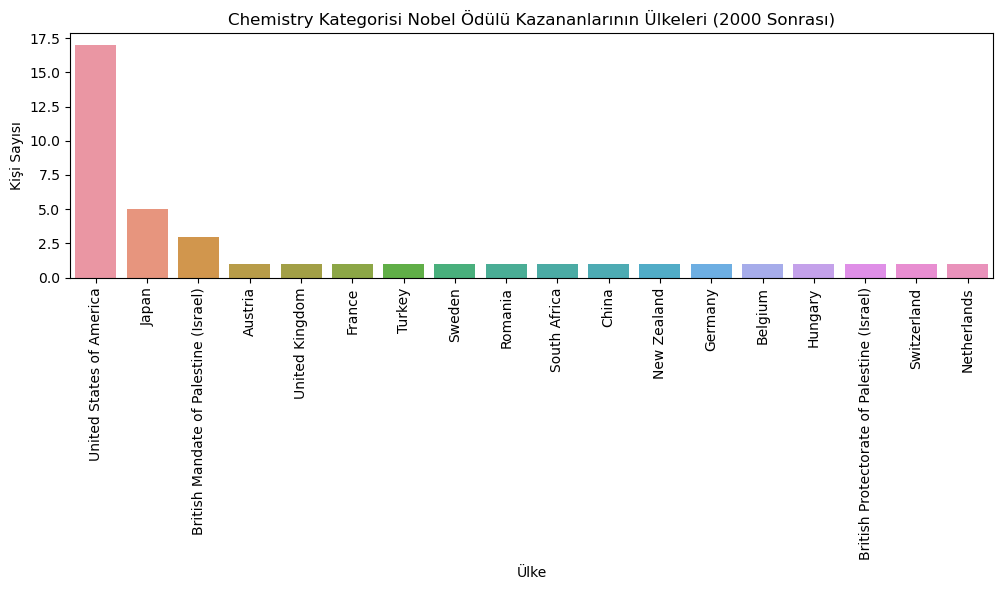

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


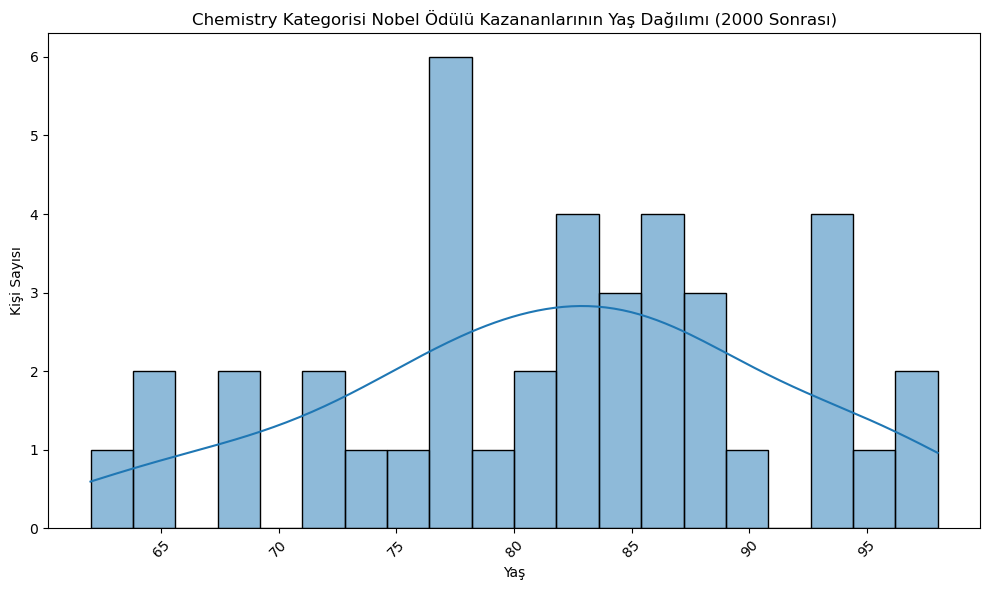

C:\Users\dmtdg\AppData\Local\Temp\ipykernel_25428\1408561280.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['age'] = datetime.now().year - pd.to_datetime(category_data['birth_date']).dt.year


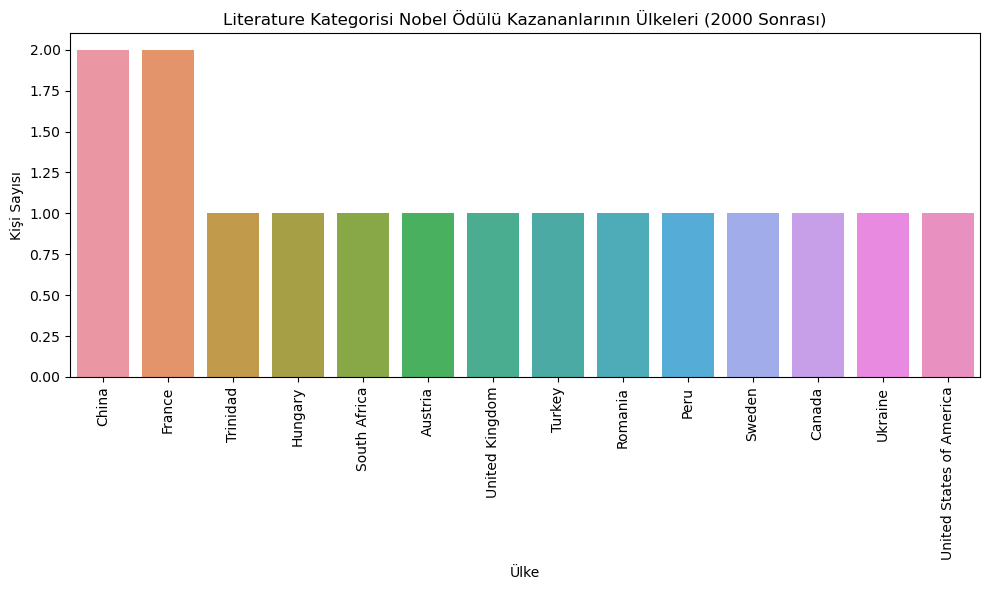

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


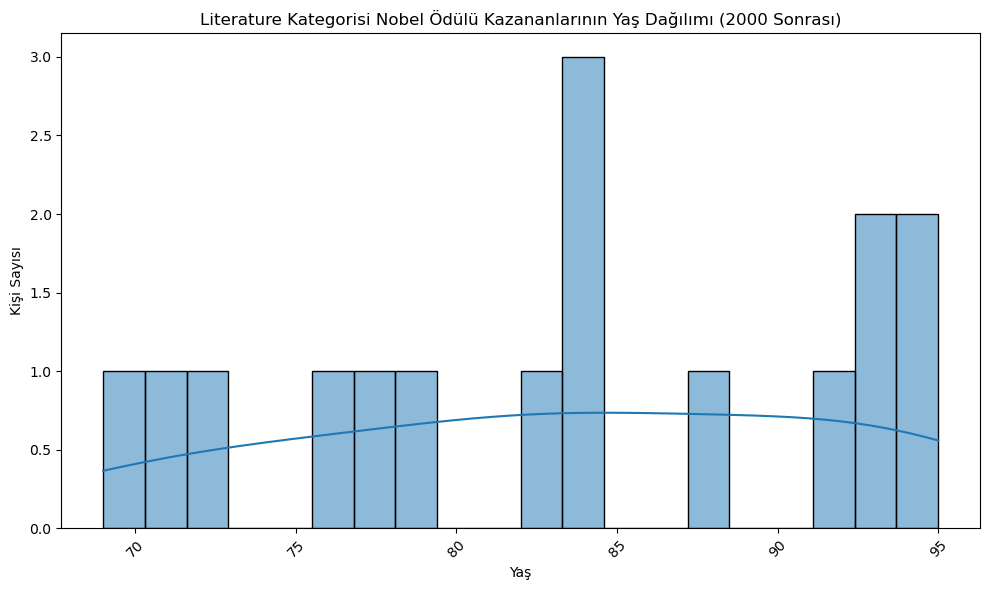

C:\Users\dmtdg\AppData\Local\Temp\ipykernel_25428\1408561280.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['age'] = datetime.now().year - pd.to_datetime(category_data['birth_date']).dt.year


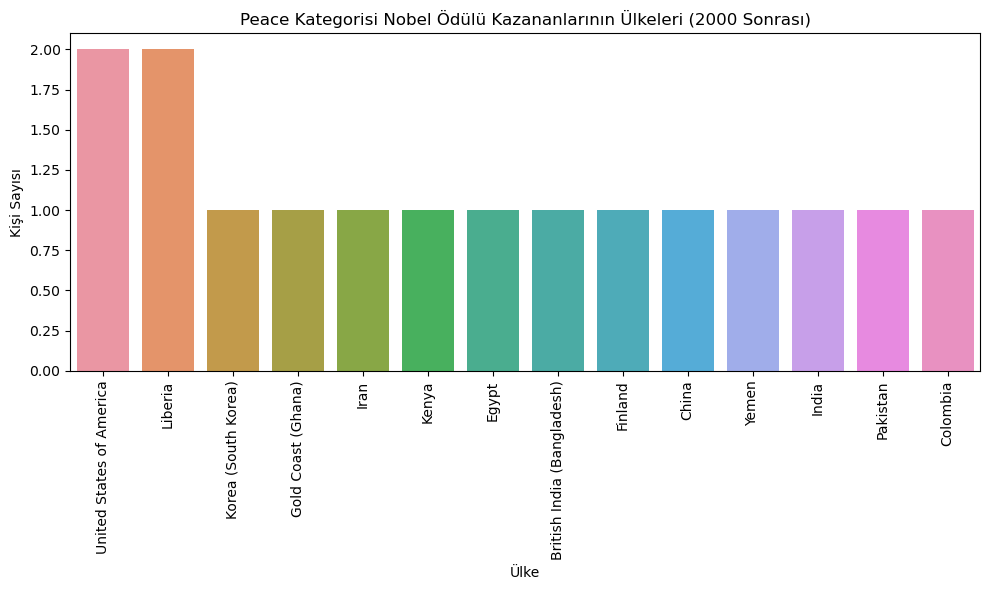

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


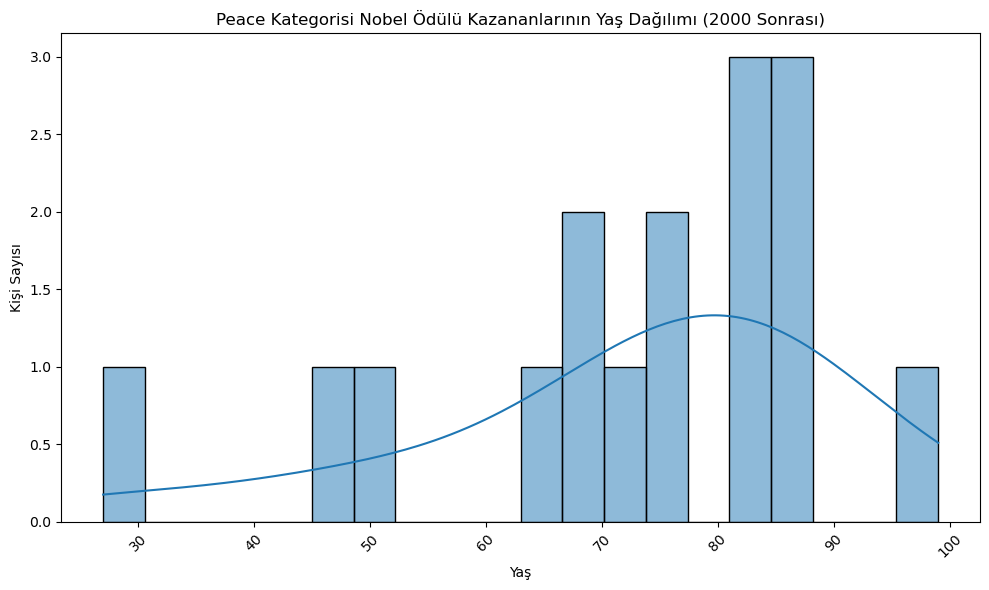

C:\Users\dmtdg\AppData\Local\Temp\ipykernel_25428\1408561280.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['age'] = datetime.now().year - pd.to_datetime(category_data['birth_date']).dt.year


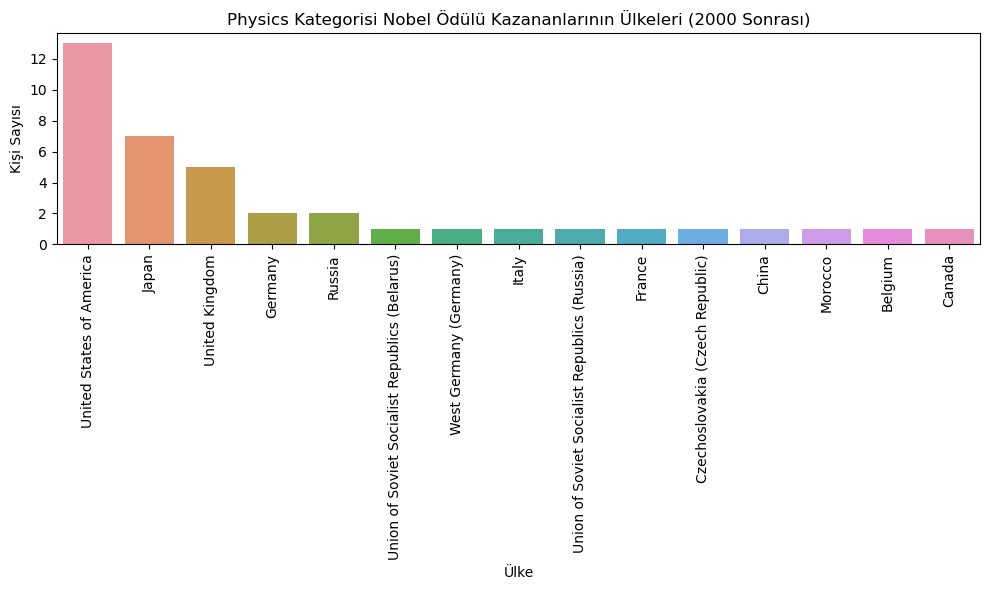

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


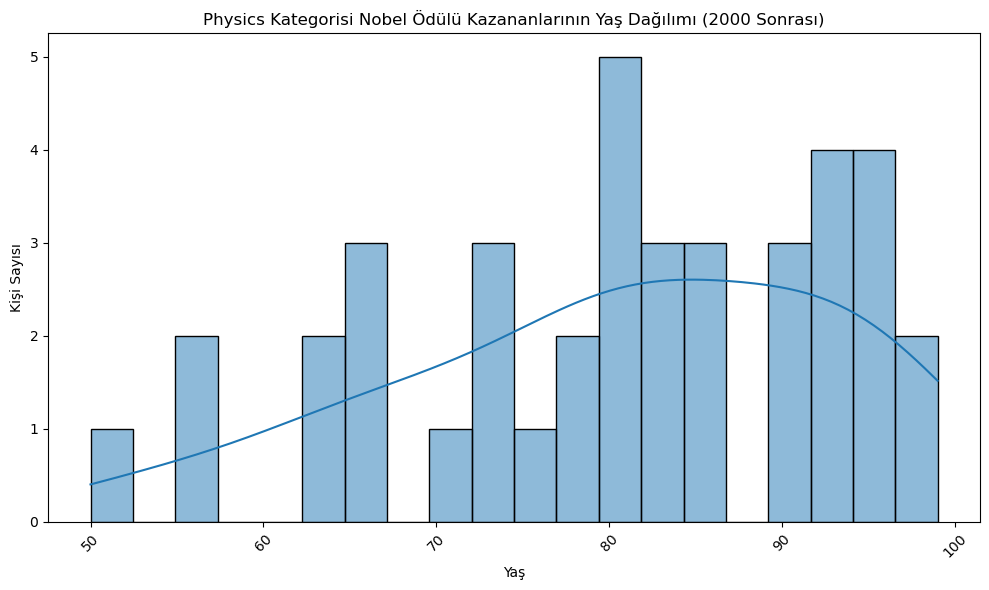

C:\Users\dmtdg\AppData\Local\Temp\ipykernel_25428\1408561280.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['age'] = datetime.now().year - pd.to_datetime(category_data['birth_date']).dt.year


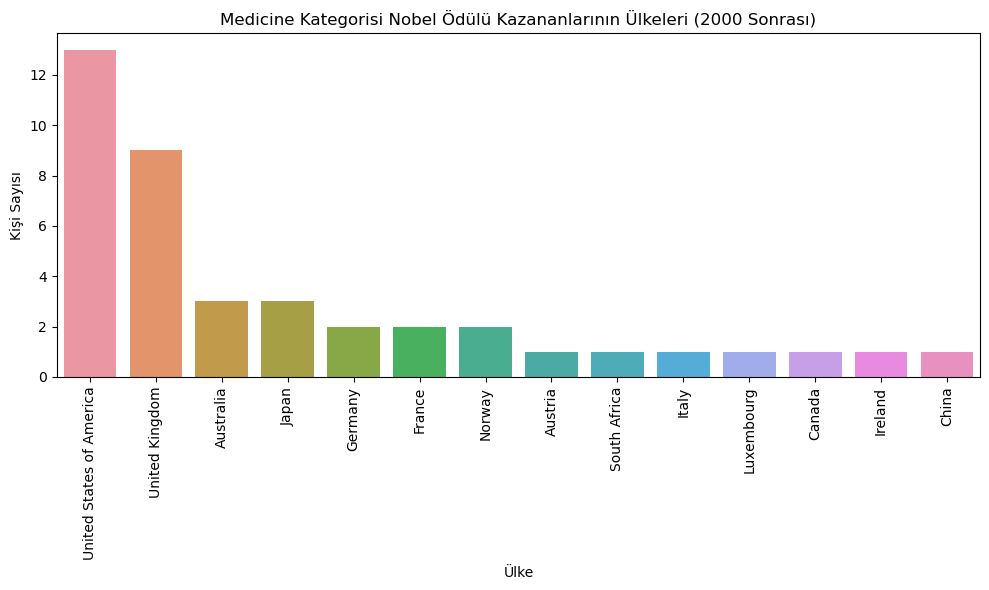

C:\Users\dmtdg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


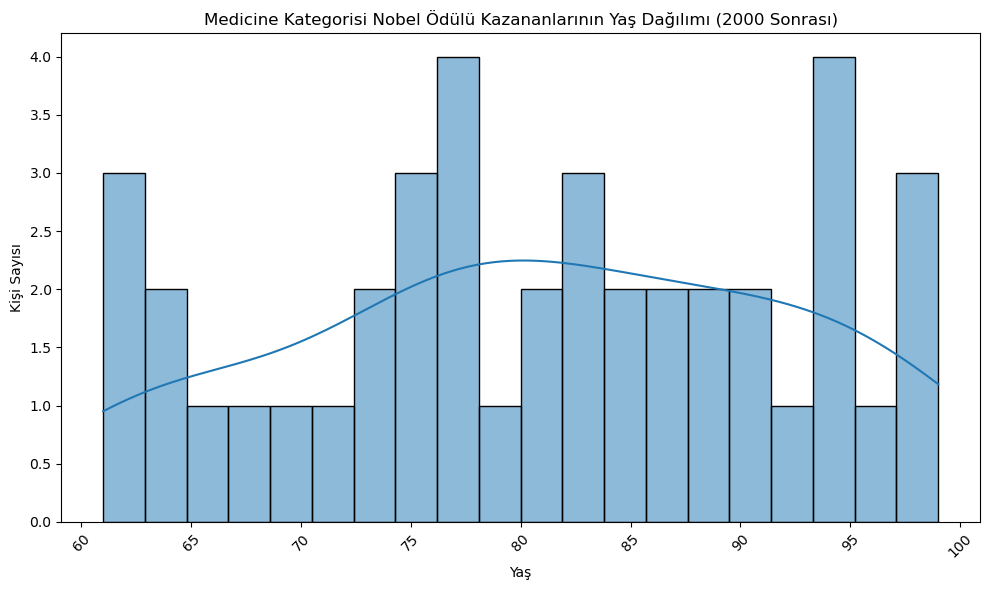

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Kategoriler listesi
categories = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']

# 2000 sonrasındaki kişilerin verilerini filtrele
data_after_2000 = nobel_data[nobel_data['year'] >= 2000]

for category in categories:
    # Kategorilere göre filtrele
    category_data = data_after_2000[data_after_2000['category'] == category]
    
    # Yaşları hesapla ve 100 yaşından küçük olanları filtrele
    category_data['age'] = datetime.now().year - pd.to_datetime(category_data['birth_date']).dt.year
    category_data = category_data[category_data['age'] < 100]
    
    # Ülkelerin dağılımını görselleştir
    plt.figure(figsize=(10, 6))
    sns.countplot(data=category_data, x='birth_country', order=category_data['birth_country'].value_counts().index)
    plt.title(f'{category} Kategorisi Nobel Ödülü Kazananlarının Ülkeleri (2000 Sonrası)')
    plt.xlabel('Ülke')
    plt.ylabel('Kişi Sayısı')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Yaş dağılımını görselleştir
    plt.figure(figsize=(10, 6))
    sns.histplot(data=category_data, x='age', bins=20, kde=True)
    plt.title(f'{category} Kategorisi Nobel Ödülü Kazananlarının Yaş Dağılımı (2000 Sonrası)')
    plt.xlabel('Yaş')
    plt.ylabel('Kişi Sayısı')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


8.SORU YORUMU: Veriler de ki yoğunluğu azaltmak grafiklerin okunurluluğunu arttırmak adına 100 yaşı bir filtre olarak kullandım. Grafiklere genel olarak baktığımız da ödül alanların yaşlarının 75-95 aralığında daha fazla olduğunu görüyoruz. Bunun ilk sebebinin ödül almak için gerekli bilgi ve donanımın oluşmasının yıllar alması kaynaklı olduğunu söyleyebiliriz. Barış grafiğine baktığımızda ise en genç ödül alanların bu kategori de olduğunu görüyoruz. Bunun sebebini de gençlerin atalarının yaptıklarından ders çıkararak daha iyi bir dünya için mücadele etme isteği olarak düşünebiliriz. Bunun örneği de ülke olarak Liberya'dır. Liberya tarihte barışçıl tarafta yer almıştır. Bunu grafiklerde de görebiliyoruz. Sağlık(Tıp) kategorisinin grafiğine baktığımız zaman her yaştan insanın(60 yaş üzeri) yıllar içerisinde nobel ödülü aldığını görüyoruz. Bunun sebebi ise sağlık alanının tarihin her anında gerek savaş gerek hastalık ve pandemik durumlar sebebiyle yeniliğe daha açık olmasının olduğunu söyleyebiliriz.